In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

import warnings; warnings.simplefilter('ignore')

In [2]:
credits=pd.read_csv('tmdb_5000_credits.csv')
movies=pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits.isna().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [6]:
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [7]:
movies=movies.merge(credits,left_on='title',right_on='title')

In [8]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
movies=movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [10]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
import ast
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [12]:
movies['genres'] = movies['genres'].apply(convert)

In [13]:
movies['genres'] 

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4809, dtype: object

In [14]:
movies['keywords'] = movies['keywords'].apply(convert)

In [15]:
movies['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4809, dtype: object

In [16]:
movies['cast']

0       [{"cast_id": 242, "character": "Jake Sully", "...
1       [{"cast_id": 4, "character": "Captain Jack Spa...
2       [{"cast_id": 1, "character": "James Bond", "cr...
3       [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4       [{"cast_id": 5, "character": "John Carter", "c...
                              ...                        
4804    [{"cast_id": 1, "character": "El Mariachi", "c...
4805    [{"cast_id": 1, "character": "Buzzy", "credit_...
4806    [{"cast_id": 8, "character": "Oliver O\u2019To...
4807    [{"cast_id": 3, "character": "Sam", "credit_id...
4808    [{"cast_id": 3, "character": "Herself", "credi...
Name: cast, Length: 4809, dtype: object

In [17]:
movies['cast'] = movies['cast'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)[:3]]) 

In [18]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [19]:
movies['crew'] = movies['crew'].apply(lambda x: [i['name'] for i in ast.literal_eval(x) if i['job'] == 'Director'])

In [20]:
movies['tags'] = movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [21]:
movies['tags']

0       [Action, Adventure, Fantasy, Science Fiction, ...
1       [Adventure, Fantasy, Action, ocean, drug abuse...
2       [Action, Adventure, Crime, spy, based on novel...
3       [Action, Crime, Drama, Thriller, dc comics, cr...
4       [Action, Adventure, Science Fiction, based on ...
                              ...                        
4804    [Action, Crime, Thriller, united states–mexico...
4805    [Comedy, Romance, Edward Burns, Kerry Bishé, M...
4806    [Comedy, Drama, Romance, TV Movie, date, love ...
4807    [Daniel Henney, Eliza Coupe, Bill Paxton, Dani...
4808    [Documentary, obsession, camcorder, crush, dre...
Name: tags, Length: 4809, dtype: object

In [22]:
movies=movies[['movie_id','title','overview','tags']]

In [23]:
movies['tags'] = movies['tags'].apply(lambda x: " ".join(x))

In [24]:
movies['tags'] = movies['tags'].apply(lambda x: x.lower())

In [25]:
movies['tags']

0       action adventure fantasy science fiction cultu...
1       adventure fantasy action ocean drug abuse exot...
2       action adventure crime spy based on novel secr...
3       action crime drama thriller dc comics crime fi...
4       action adventure science fiction based on nove...
                              ...                        
4804    action crime thriller united states–mexico bar...
4805    comedy romance edward burns kerry bishé marsha...
4806    comedy drama romance tv movie date love at fir...
4807    daniel henney eliza coupe bill paxton daniel hsia
4808    documentary obsession camcorder crush dream gi...
Name: tags, Length: 4809, dtype: object

In [26]:
movies.head()

,movie_id,title,overview,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",action adventure fantasy science fiction cultu...
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",adventure fantasy action ocean drug abuse exot...
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,action adventure crime spy based on novel secr...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,action crime drama thriller dc comics crime fi...
4,49529,John Carter,"John Carter is a war-weary, former military ca...",action adventure science fiction based on nove...


In [27]:
movies.shape

(4809, 4)

In [28]:
credits.shape

(4803, 4)

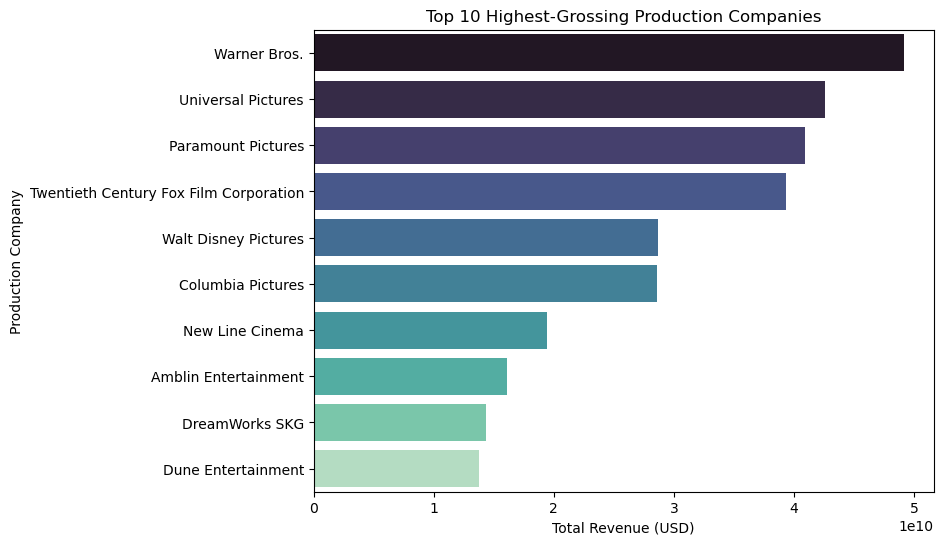

In [29]:
def extract_production_companies(company_list):
    if isinstance(company_list, list):
        return [company['name'] for company in company_list if 'name' in company]
    return []

movies_df_clean = pd.read_csv('tmdb_5000_movies.csv')[['title', 'production_companies', 'revenue']].copy()
movies_df_clean['production_companies'] = movies_df_clean['production_companies'].apply(eval).apply(extract_production_companies)
company_revenue = {}

for idx, row in movies_df_clean.iterrows():
    for company in row['production_companies']:
        if company in company_revenue:
            company_revenue[company] += row['revenue']
        else:
            company_revenue[company] = row['revenue']

top_companies = sorted(company_revenue.items(), key=lambda x: x[1], reverse=True)[:10]
companies, revenues = zip(*top_companies)
plt.figure(figsize=(8, 6))
sns.barplot(x=list(revenues), y=list(companies), palette='mako')
plt.title("Top 10 Highest-Grossing Production Companies")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Production Company")
plt.show()


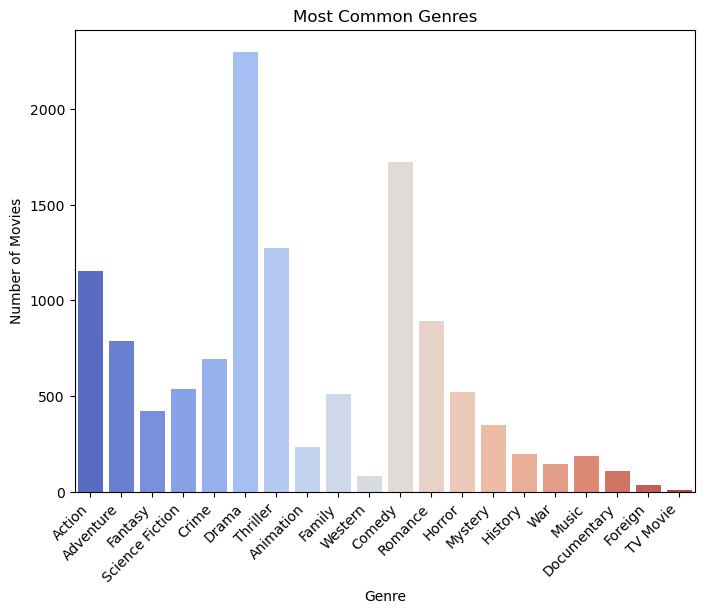

In [30]:
from collections import Counter
def extract_genres_direct(genre_list):
    if isinstance(genre_list, list):
        return [genre['name'] for genre in genre_list if 'name' in genre]
    return []

# Load and clean the DataFrame
movies_df_clean = pd.read_csv('tmdb_5000_movies.csv')[['title', 'genres', 'release_date', 'popularity', 'revenue', 'runtime']].copy()

# Extract genres
movies_df_clean['genres'] = movies_df_clean['genres'].apply(eval).apply(extract_genres_direct)

# Count the genres
all_genres = [genre for genres_list in movies_df_clean['genres'] for genre in genres_list]
genre_counts = Counter(all_genres)

# Visualize the most common genres
plt.figure(figsize=(8, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette='coolwarm')
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45, ha="right")
plt.show()


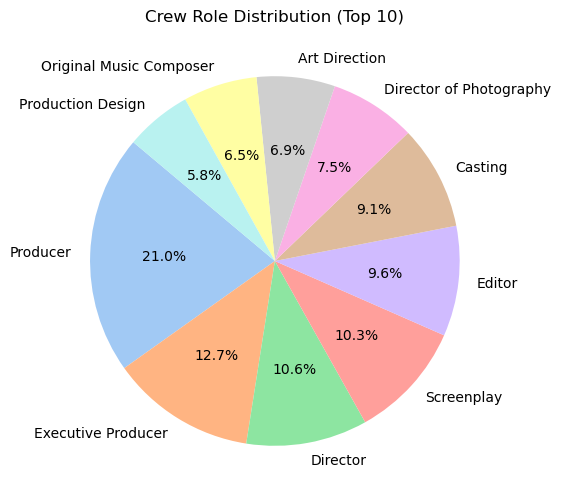

In [31]:
from collections import Counter
credits_df_clean = pd.read_csv('tmdb_5000_credits.csv')[['crew']].copy()

def extract_crew_roles(crew_list):
    if isinstance(crew_list, list):
        return [member['job'] for member in crew_list if 'job' in member]
    return []

credits_df_clean['crew_roles'] = credits_df_clean['crew'].apply(eval).apply(extract_crew_roles)
all_roles = [role for roles_list in credits_df_clean['crew_roles'] for role in roles_list]
role_counts = Counter(all_roles)

top_roles = role_counts.most_common(10)
roles, counts = zip(*top_roles)
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=roles, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Crew Role Distribution (Top 10)")
plt.show()


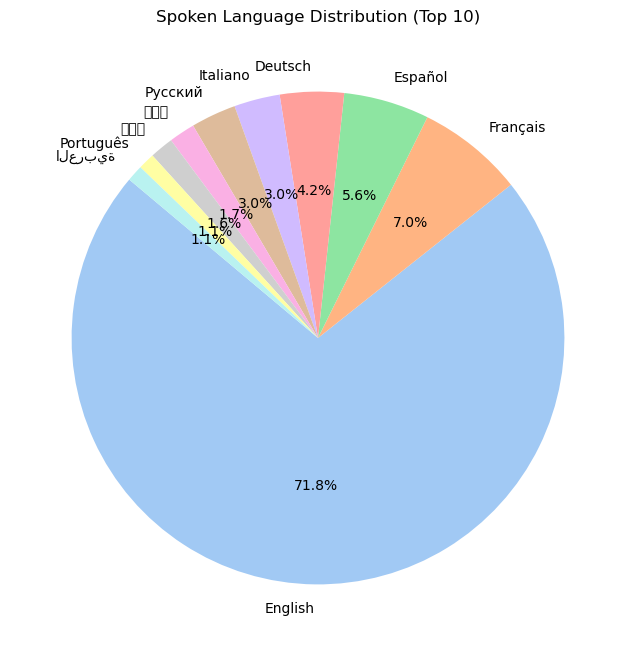

In [32]:
from collections import Counter
movies_df_clean = pd.read_csv('tmdb_5000_movies.csv')[['spoken_languages']].copy()

def extract_languages(language_list):
    if isinstance(language_list, list):
        return [language['name'] for language in language_list if 'name' in language]
    return []

# Extract languages from the spoken_languages column
movies_df_clean['spoken_languages'] = movies_df_clean['spoken_languages'].apply(eval).apply(extract_languages)

# Flatten the list of spoken languages
all_languages = [lang for langs_list in movies_df_clean['spoken_languages'] for lang in langs_list]

# Count the languages
language_counts = Counter(all_languages)

# Prepare data for visualization (top 10 languages)
top_languages = language_counts.most_common(10)
languages, counts = zip(*top_languages)

# Visualize the language distribution
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=languages, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Spoken Language Distribution (Top 10)")
plt.show()


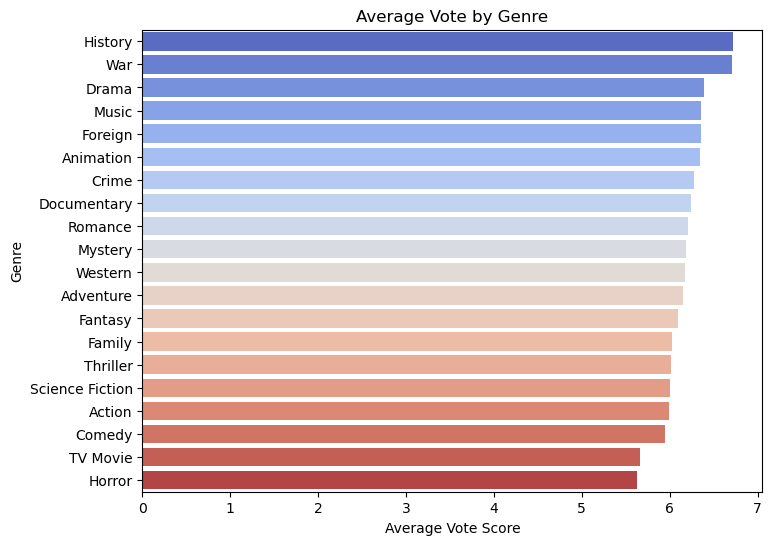

In [33]:
from collections import Counter
movies_df_clean = pd.read_csv('tmdb_5000_movies.csv')[['genres', 'vote_average']].copy()

def extract_genres(genre_list):
    if isinstance(genre_list, list):
        return [genre['name'] for genre in genre_list if 'name' in genre]
    return []


movies_df_clean['genres'] = movies_df_clean['genres'].apply(eval).apply(extract_genres)
genre_votes = {}

for idx, row in movies_df_clean.iterrows():
    for genre in row['genres']:
        if genre in genre_votes:
            genre_votes[genre].append(row['vote_average'])
        else:
            genre_votes[genre] = [row['vote_average']]

average_votes_by_genre = {genre: sum(votes)/len(votes) for genre, votes in genre_votes.items()}
genres, avg_votes = zip(*sorted(average_votes_by_genre.items(), key=lambda x: x[1], reverse=True))

# Visualize the average vote by genre
plt.figure(figsize=(8, 6))
sns.barplot(x=list(avg_votes), y=list(genres), palette='coolwarm')
plt.title("Average Vote by Genre")
plt.xlabel("Average Vote Score")
plt.ylabel("Genre")
plt.show()


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['tags'])

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [36]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

In [37]:
print(get_recommendations('The Dark Knight Rises'))

65               The Dark Knight
119                Batman Begins
1360                      Batman
210               Batman & Robin
428               Batman Returns
1361                      Batman
1197                The Prestige
303                     Catwoman
4644    Amidst the Devil's Wings
72                 Suicide Squad
Name: title, dtype: object


In [38]:
print(get_recommendations('Avatar'))

2405                     Aliens
838                      Alien³
47      Star Trek Into Darkness
3161                      Alien
278          Planet of the Apes
373             Mission to Mars
4338             Silent Running
1533                  Moonraker
239                     Gravity
541                     Soldier
Name: title, dtype: object


In [39]:
print(get_recommendations('Spectre'))

11                    Quantum of Solace
29                              Skyfall
147                     Die Another Day
3889                         Goldfinger
4345                             Dr. No
425                 Mission: Impossible
3146                You Only Live Twice
3254    On Her Majesty's Secret Service
277                       Casino Royale
1344              Never Say Never Again
Name: title, dtype: object
